In [6]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
events = [
        "Riding",
        "Fighting",
        "Playing",
        "Running",
        'Lying',
        "Chasing",
        "Jumping",
        "Falling",
        "Guiding",
        "Stealing",
        "Littering",
        "Tripping",
        "Pickpockering",
    ]
description = [
    "a person riding a bicycle",
    "a certain number of persons fighting",
    "a group of persons playing",
    "a person running",
    "a person lying in the floor",
    "a person chasing other person",
    "a person jumping",
    "a person falling",
    "a person guiding other person",
    "a person stealing other person",
    "a person throwing trash in the floor",
    "a person tripping",
    "a person stealing other person's pocket",
]
rute='/home/ubuntu/Tesis/Results/Tesis/PerformanceNewPrompt/'
file='TestingNWPUIITB.csv'
df = pd.read_csv(f"{rute}{file}")
file='TestingJanusPrompts.csv'
df2 = pd.read_csv(f"{rute}{file}")
df["Process time"] = df["Process time"] / df["Duration"]
df2["Process time"] = df2["Process time"] / df2["Duration"]
df['Process time'] = 25.0 /df['Process time'] 
df2['Process time'] = 30.0 /df2['Process time'] 
df= pd.concat([df2, df], ignore_index=True)
df.drop(columns=['Check event', 'Duration', 'Process time'], inplace=True)
print(df.columns)


Index(['Name', 'Mode', 'True Positive', 'False Positive', 'False Negative',
       'True Negative', 'True Event', 'Validations Number'],
      dtype='object')


In [7]:
normal_class = "normal view (persons walking or standing)"
all_classes =  description+[normal_class]
class_to_idx = {cls: idx for idx, cls in enumerate(all_classes)}
num_classes = len(all_classes)  # 14
#cm = np.zeros((num_classes, num_classes), dtype=int)
modes=df['Mode'].unique()
mode_names = {
    0: "M5: Detector con reglas, MLLM e información",
    1: "M1: MLLM Solo",
    2: "M3: Detector, MLLM e información",
    3: "M4: Detector con reglas y MLLM",
    4: "M2: Detector con reglas",
}


In [8]:
df_check = df.copy().drop(columns=['Name'])
df_check=df_check.groupby(['Mode', 'True Event']).sum()
df_check = df_check.reset_index()
df_check.drop(columns=['True Event'], inplace=True)
df_check=df_check.groupby(['Mode']).sum()
df_check = df_check.reset_index()
df_check['Total'] = df_check.drop(columns=['Validations Number', 'Mode']).sum(axis=1)
df_check.set_index('Mode', inplace=True)
df_check = df_check.rename(index=mode_names).sort_index()

print(df_check)

                                             True Positive  False Positive  \
Mode                                                                         
M1: MLLM Solo                                        18925           12049   
M2: Detector con reglas                               7530            4287   
M3: Detector, MLLM e información                     22935           20982   
M4: Detector con reglas y MLLM                        5557            1768   
M5: Detector con reglas, MLLM e información           7154            4080   

                                             False Negative  True Negative  \
Mode                                                                         
M1: MLLM Solo                                          4635          11483   
M2: Detector con reglas                               14080          15869   
M3: Detector, MLLM e información                        625           2550   
M4: Detector con reglas y MLLM                         1613    

0 

1 

2 

3 

4 



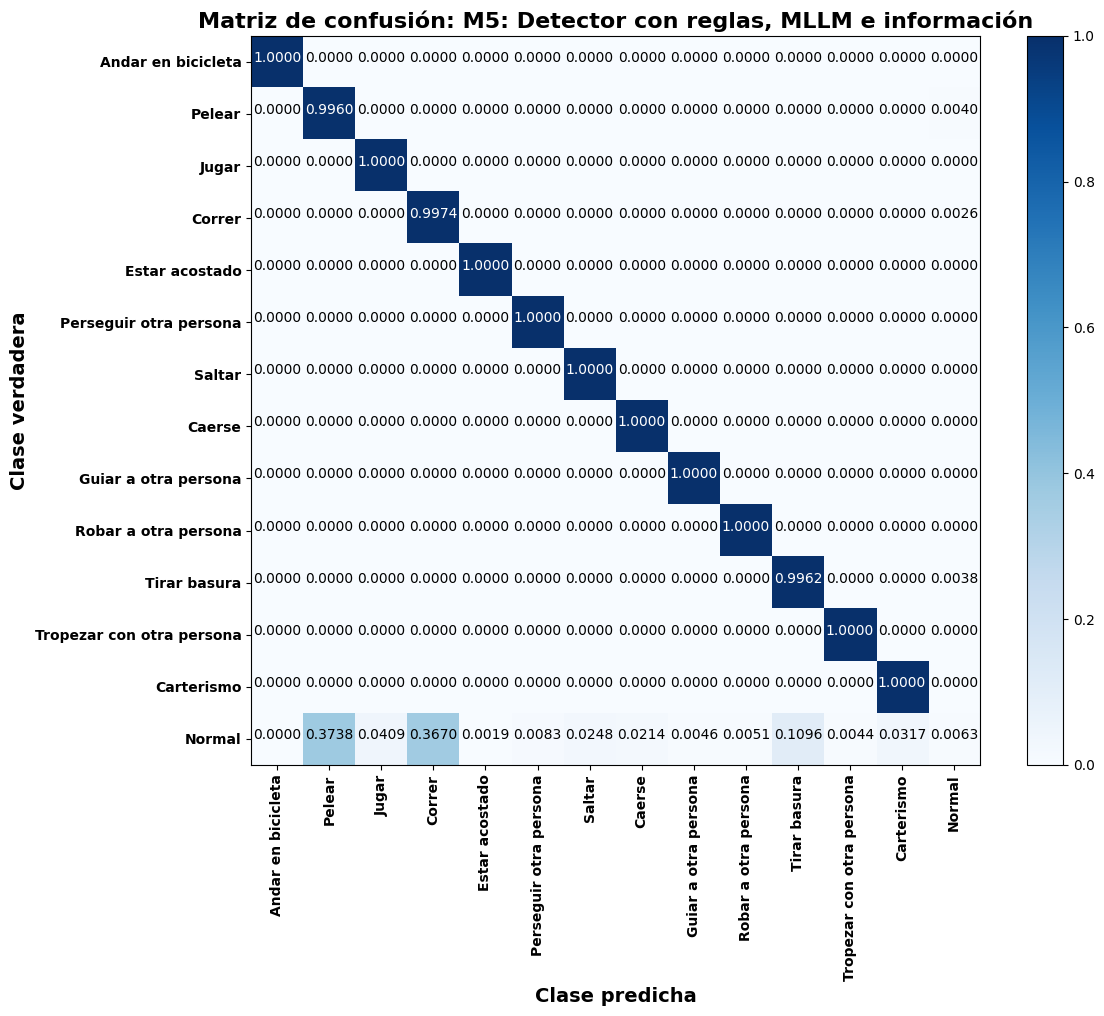

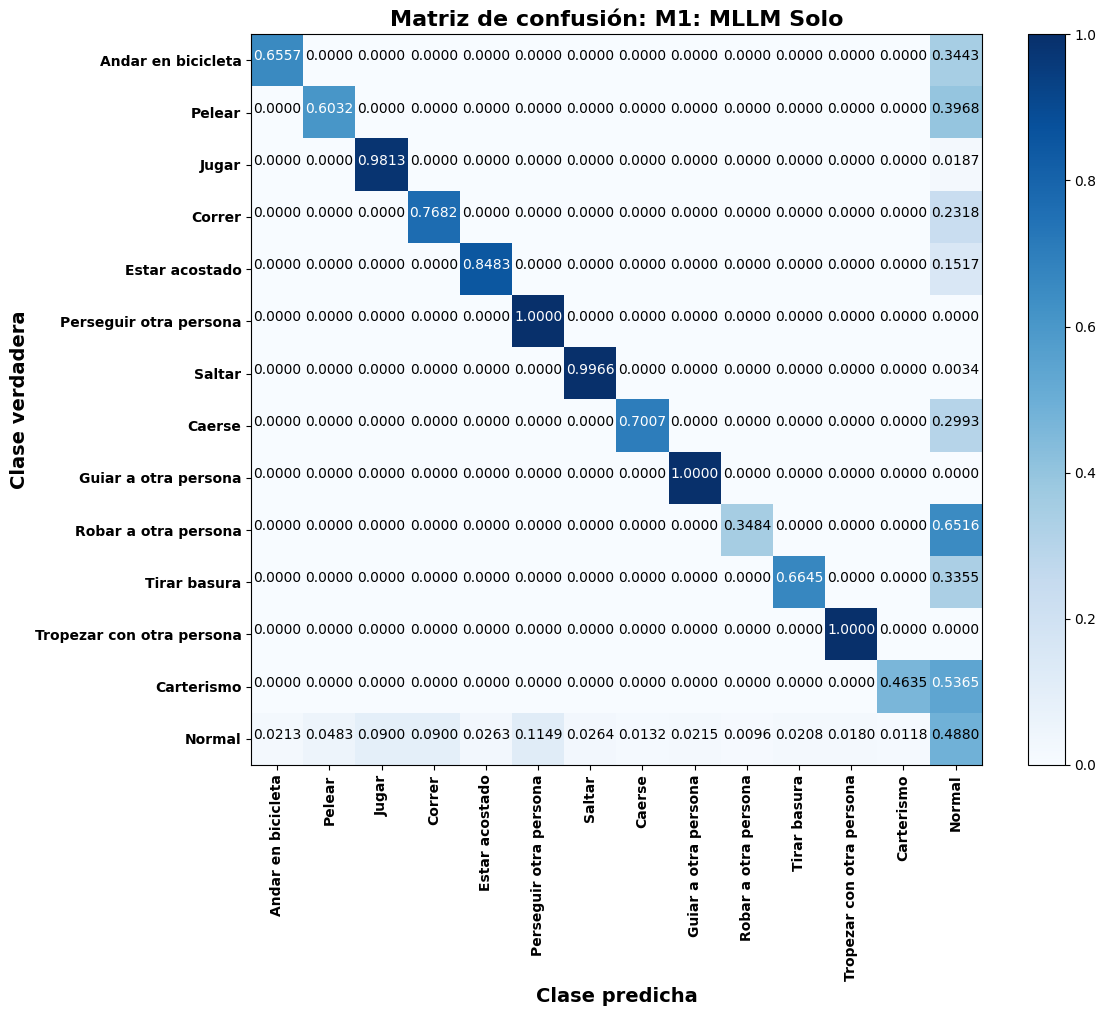

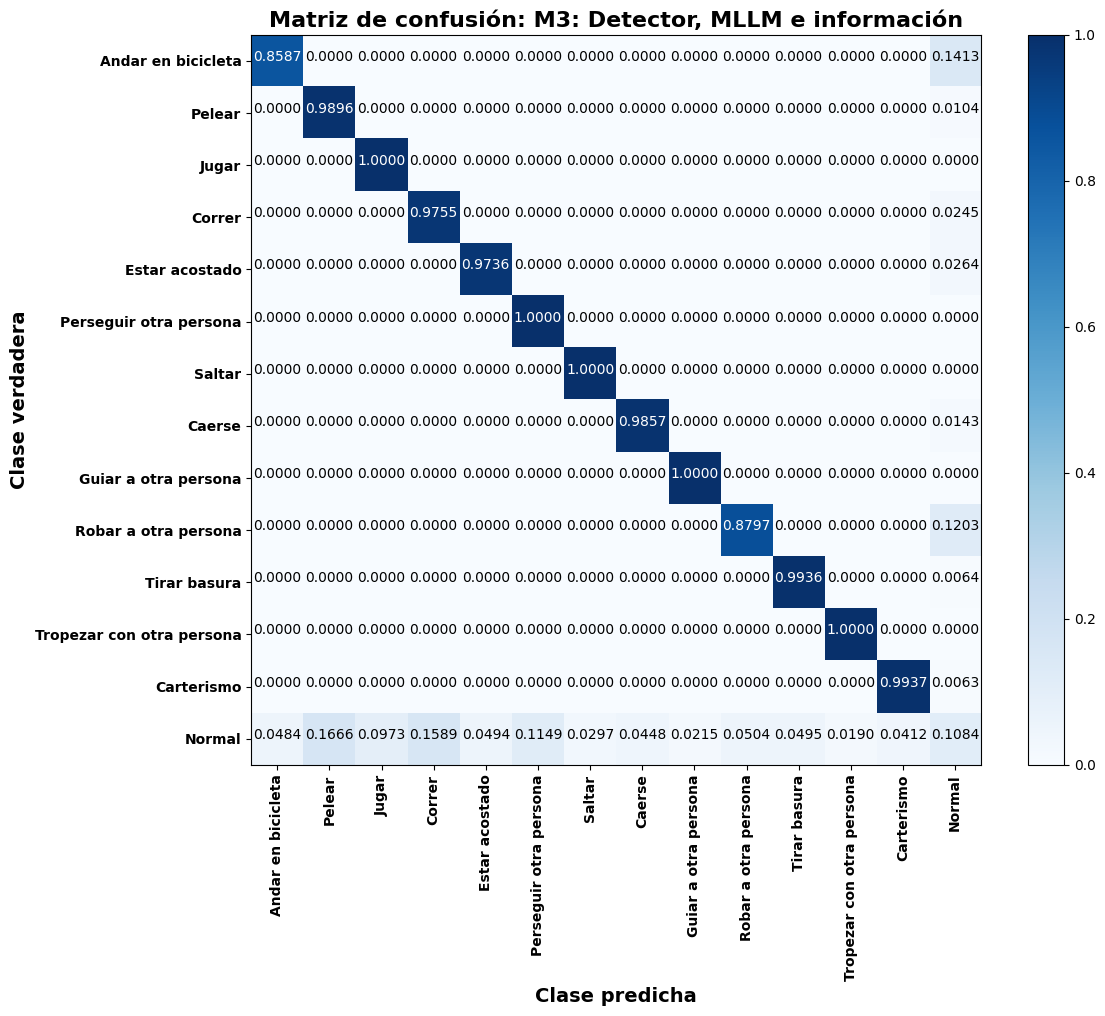

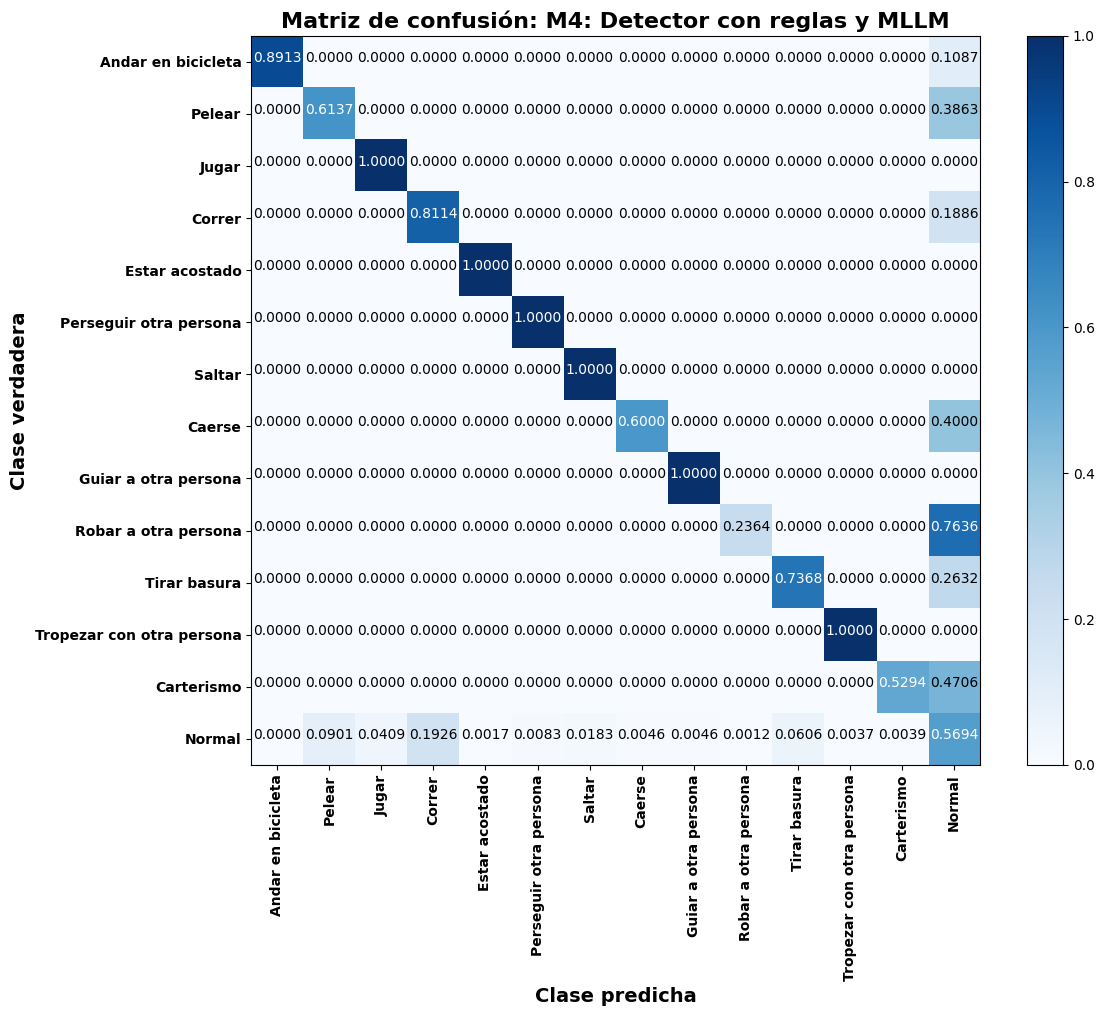

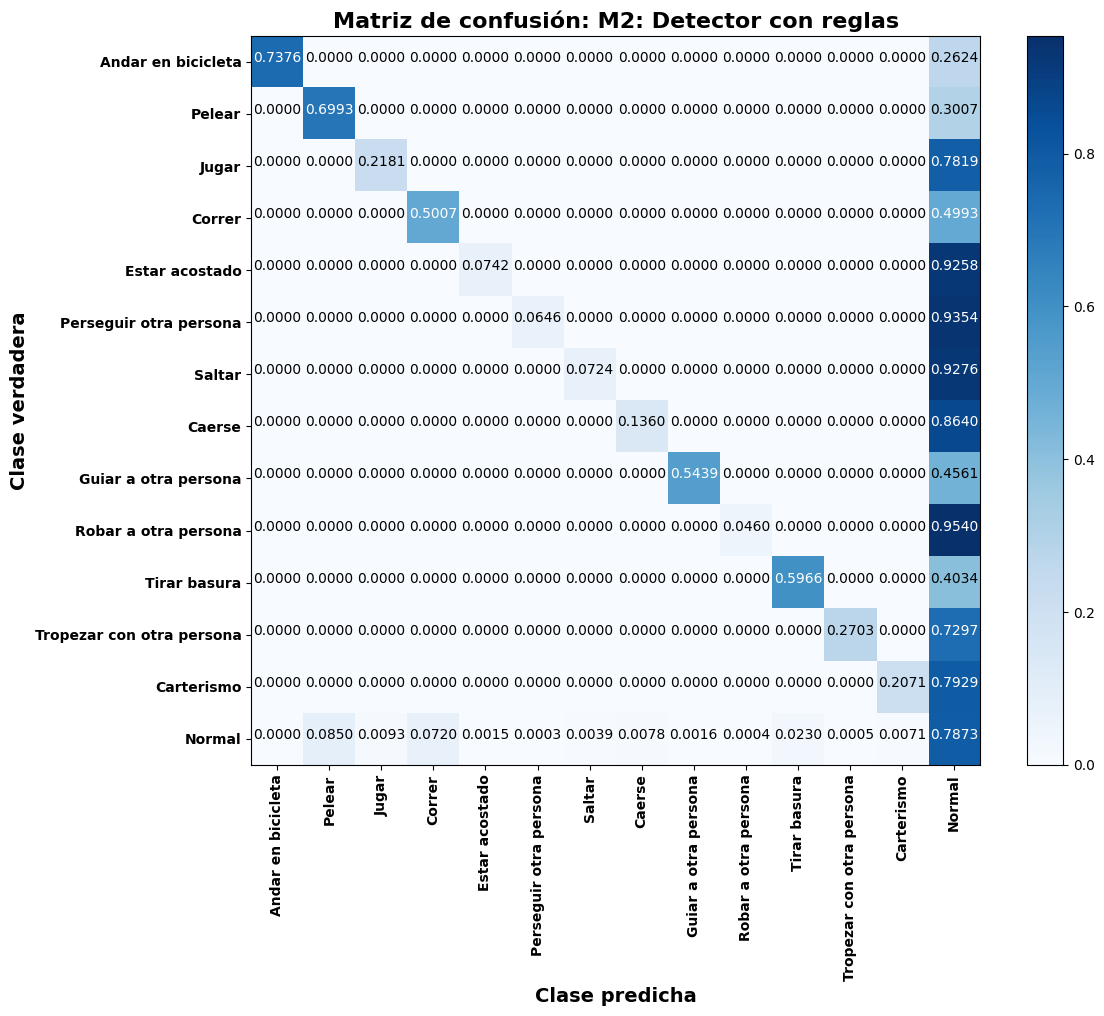

In [9]:

for mode in modes:
    cm = np.zeros((num_classes, num_classes), dtype=int)
    df_mode = df.loc[df['Mode'] == mode]
    usage = mode_names[mode]
    print(mode, '\n')
    for index, row in df_mode.iterrows():
        #True positive
        true_class=row['True Event']
        pred_class=row['True Event']
        true_idx = class_to_idx.get(true_class, -1)
        pred_idx = class_to_idx.get(pred_class, -1)
        if true_idx != -1 and pred_idx != -1:
                cm[true_idx, pred_idx] += row['True Positive']
        #False positive
        true_class=normal_class
        pred_class=row['True Event']
        true_idx = class_to_idx.get(true_class, -1)
        pred_idx = class_to_idx.get(pred_class, -1)
        if true_idx != -1 and pred_idx != -1:
                cm[true_idx, pred_idx] += row['False Positive']
        #False negative
        true_class=row['True Event']
        pred_class=normal_class
        true_idx = class_to_idx.get(true_class, -1)
        pred_idx = class_to_idx.get(pred_class, -1)
        if true_idx != -1 and pred_idx != -1:
                cm[true_idx, pred_idx] += row['False Negative']
        #True Negative
        true_class=normal_class
        pred_class=normal_class
        true_idx = class_to_idx.get(true_class, -1)
        pred_idx = class_to_idx.get(pred_class, -1)
        if true_idx != -1 and pred_idx != -1:
                cm[true_idx, pred_idx] += row['True Negative']
    ''' Get ground truth
                is_anomaly = frames[frames_number[i] - 1]  # 0 or 1
                # Determine true class using EVENT when anomaly exists
                true_class = event if is_anomaly == 1 else normal_class
                pred_class = predicted_events[i]
                if prompts[i] == "" and (mode==0 or mode==2):
                    pass
                elif prompts[i] == "yes":
                    pass
                elif prompts[i] == "no":
                    continue
                else:
                    if true_class == pred_class:
                        pass
                    else:
                        print(f'{true_class} {pred_class}\n')
                        continue
                # Get predicted class
                # Convert to indices (skip if class not recognized)
                true_idx = class_to_idx.get(true_class, -1)
                pred_idx = class_to_idx.get(pred_class, -1)
                
                if true_idx != -1 and pred_idx != -1:
                    cm[true_idx, pred_idx] += 1'''
    plt.figure(figsize=(12, 10))
    cm = cm / cm.sum(axis=1, keepdims=True)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f"Matriz de confusión: {mode_names[mode]}", fontsize=16, fontweight='bold')
    plt.xlabel("Clase predicha", fontsize=14, fontweight='bold')
    plt.ylabel("Clase verdadera", fontsize=14, fontweight='bold')
    plt.colorbar()
    # Replace class names with the ones from the replace list
    replace = [
        "Andar en bicicleta",
        "Pelear",
        "Jugar",
        "Correr",
        'Estar acostado',
        "Perseguir otra persona",
        "Saltar",
        "Caerse",
        "Guiar a otra persona",
        "Robar a otra persona",
        "Tirar basura",
        "Tropezar con otra persona",
        "Carterismo",
        'Normal',
    ]
    updated_classes = replace
    tick_marks = np.arange(num_classes)   
    plt.xticks(tick_marks, updated_classes, rotation=90, fontweight='bold')  # Rotate x-axis labels for better visibility
    plt.yticks(tick_marks, updated_classes, fontweight='bold')   # Annotate the matrix with the values
    thresh = cm.max() / 2.0
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, f"{cm[i, j]:.4f}",
                            horizontalalignment="center",
                            color="white" if cm[i, j] > thresh else "black")   
    plt.tight_layout()
    plt.savefig(f"CM/confusion_matrix_{mode_names[mode]}.png", bbox_inches='tight')
plt.show()